In [1]:
%cd /content/drive/MyDrive/LearningMaterial/RL

/content/drive/MyDrive/LearningMaterial/RL


In [2]:
!git clone https://github.com/JKCooper2/gym-bandits



Cloning into 'gym-bandits'...
remote: Enumerating objects: 73, done.
remote: Total 73 (delta 0), reused 0 (delta 0), pack-reused 73
Unpacking objects: 100% (73/73), done.


In [3]:
%cd gym-bandits/

/content/drive/My Drive/LearningMaterial/RL/gym-bandits


In [6]:
import gym
import gym_bandits
import numpy as np

In [7]:
env = gym.make("BanditTwoArmedHighLowFixed-v0")


> **Softmax Exploration is also known as Boltzmann exploration**

**The arm that has the maximum average reward will have high probability, and all the non-best arms have a probability proportional to their average reward.**

Thus, in softmax exploration, we select the arms based on a probability. The probability of each arm is directly proportional to its average reward:

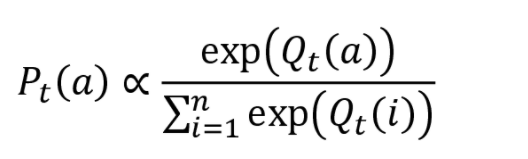

in the initial rounds we will not know the correct average reward of each arm, so selecting the arm based on the probability of average reward will be inaccurate in the initial rounds. To avoid this, we introduce a new parameter called T. T is called the temperature parameter.

We can rewrite the preceding equation with the temperature T, as shown here:

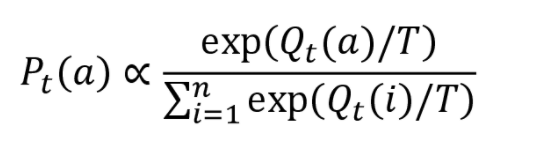

In [8]:
count = np.zeros(2)
sum_rewards = np.zeros(2)
Q = np.zeros(2)
num_rounds = 100

In [9]:
def softmax(T):

  denom = sum([np.exp(i/T) for i in Q])
  probs = [np.exp(i/T)/denom for i in Q]

  arm = np.random.choice(env.action_space.n, p= probs)

  return arm

In [10]:
T = 50

In [14]:
for i in range(num_rounds):

  arm = softmax(T)
  s_, r, done, info = env.step(arm)
  count[arm] += 1
  sum_rewards[arm] += r
  Q[arm] = sum_rewards[arm]/count[arm]

  T = T*0.99


In [15]:
Q

array([0.79     , 0.1980198])

In [16]:
# So optimal arm is
np.argmax(Q)

0